In [1]:
# !pip install chainer

import pandas as pd
import numpy as np

import torch
import torch.nn as nn

from torch import optim
from torch.nn import functional as F

from tqdm import tqdm
from IPython.display import clear_output

import utils
import models

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="3"

%matplotlib inline

In [2]:
trainloader, validloader, vocab, word2id, id2word = utils.prepare_imdb_dataloaders(path_to_pkl='data/matrix.pkl',
                                                                            forward=True)

Data has been successfully loaded


In [3]:
batch_size = 64
hidden_dim = 256
linear_dim = 256
embedding_dim = 128
vocab_size = len(vocab) + 2
n_layers = 1

model = models.language_model.LanguageModel(hidden_dim, vocab_size, embedding_dim, 
                                            linear_dim, n_layers, train_on_gpu=True)

In [4]:
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

Epoch [17/25], Loss: 3.9820
Validation perplexity:  105.2939286100605


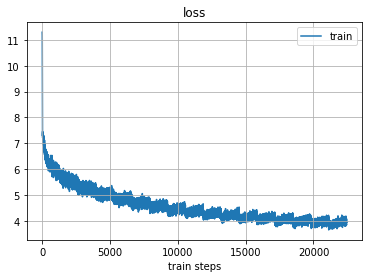

  0%|          | 1/1320 [00:00<02:26,  9.03it/s]

Epoch:  17


100%|██████████| 1320/1320 [01:21<00:00, 22.60it/s]


Desired perplexity has been successfully achieved!


In [5]:
models.language_model.train(model, opt, 25, trainloader, validloader, train_on_gpu=True, path='pretrained_forward.pt', print_every=1)

In [8]:
net = models.language_model.LanguageModel(hidden_dim, vocab_size, embedding_dim, 
                                            linear_dim, n_layers, train_on_gpu=True)

In [9]:
net.load_state_dict(torch.load('pretrained_forward_105.pt'))

In [10]:
net.eval()

LanguageModel(
  (embeddings): Embedding(80392, 128)
  (lstm): LSTM(128, 256, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=80392, bias=True)
  )
)

In [14]:
print('Total perplexity: ', 2**np.mean(models.language_model.eval_epoch(net, validloader, eval_on_gpu=True)))

Total perplexity:  105.27533784680588
